<a href="https://colab.research.google.com/github/prcstak/service_text_recognition/blob/main/notebooks/rotate_and_crop_section.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("/content/Scan2023-10-28_194113.jpg")

hsv_min = np.array((2, 28, 65), np.uint8)
hsv_max = np.array((26, 238, 255), np.uint8)


img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

In [ ]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

In [ ]:
cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

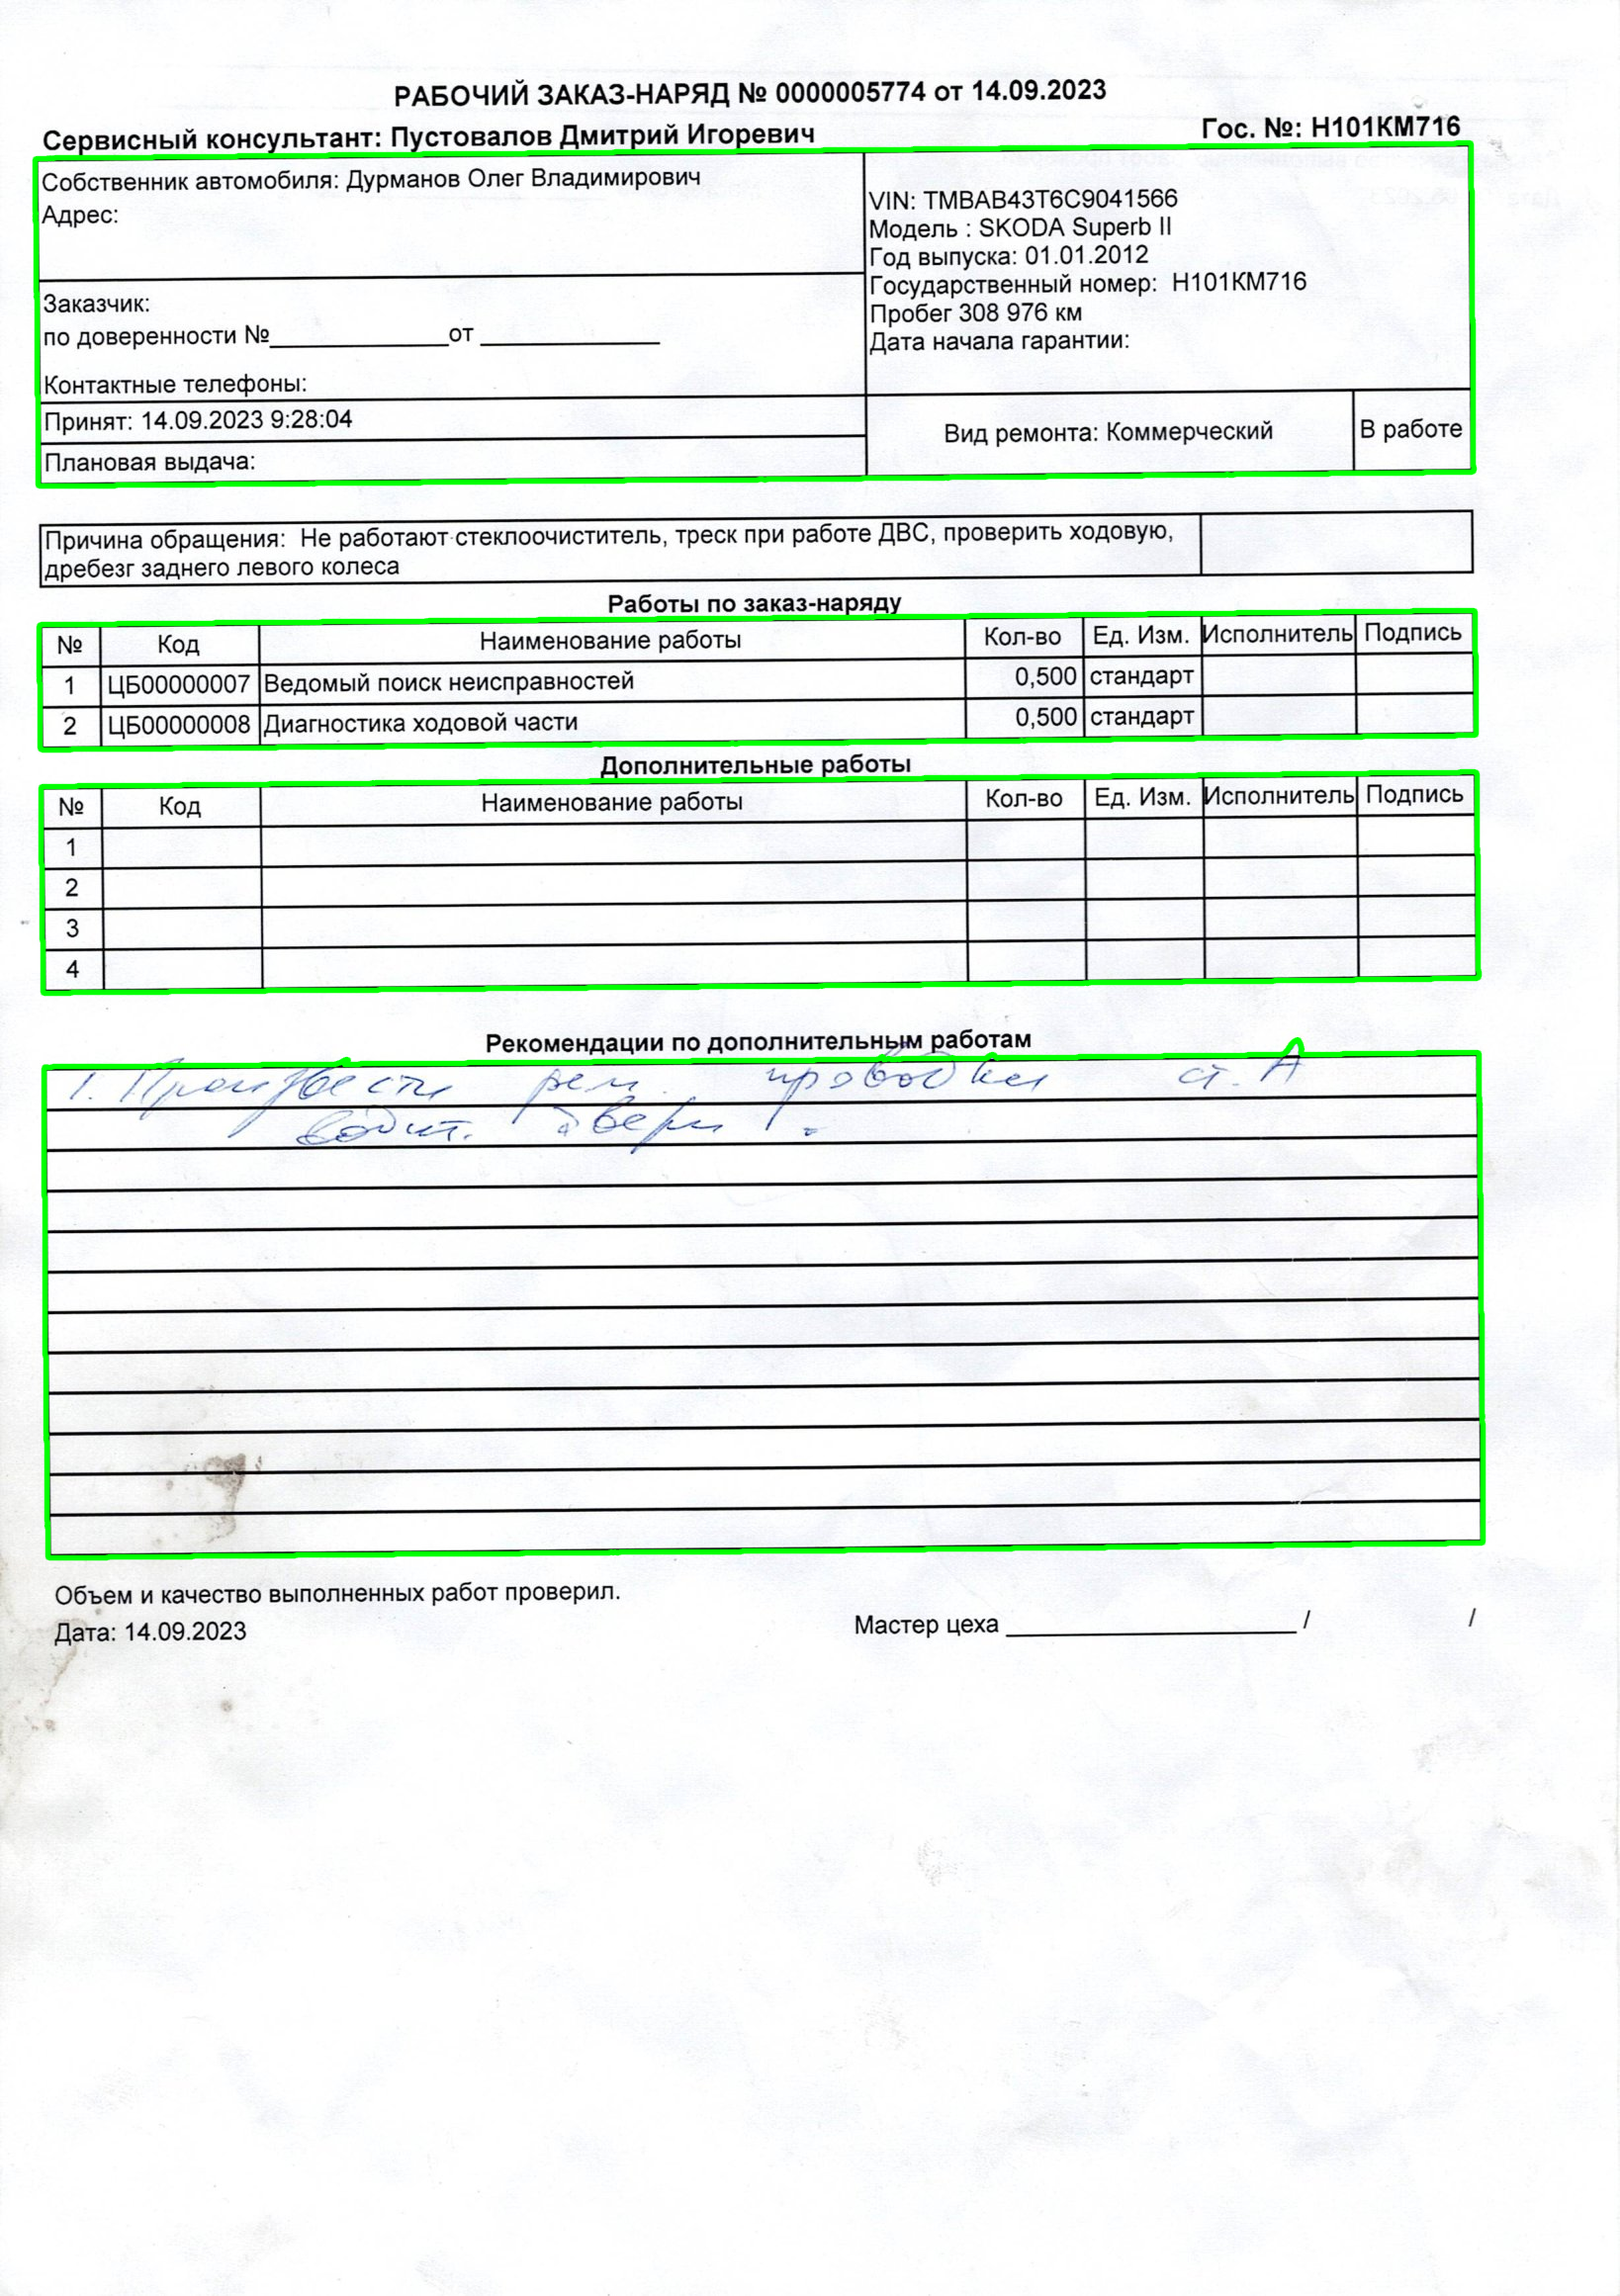

In [ ]:
res = cv2.drawContours( img.copy(), cntsSorted[1:5], -1, (0,255,0), 3, cv2.LINE_AA)
cv2_imshow(res) # выводим итоговое изображение в окно

<ipython-input-269-3f5698938823>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x*vy/vx) + y)
<ipython-input-269-3f5698938823>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols-x)*vy/vx)+y)
<ipython-input-269-3f5698938823>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  angle_2_x   = float(np.arccos(dot_product))


0.012250974356963673
0.7022851542208475
1


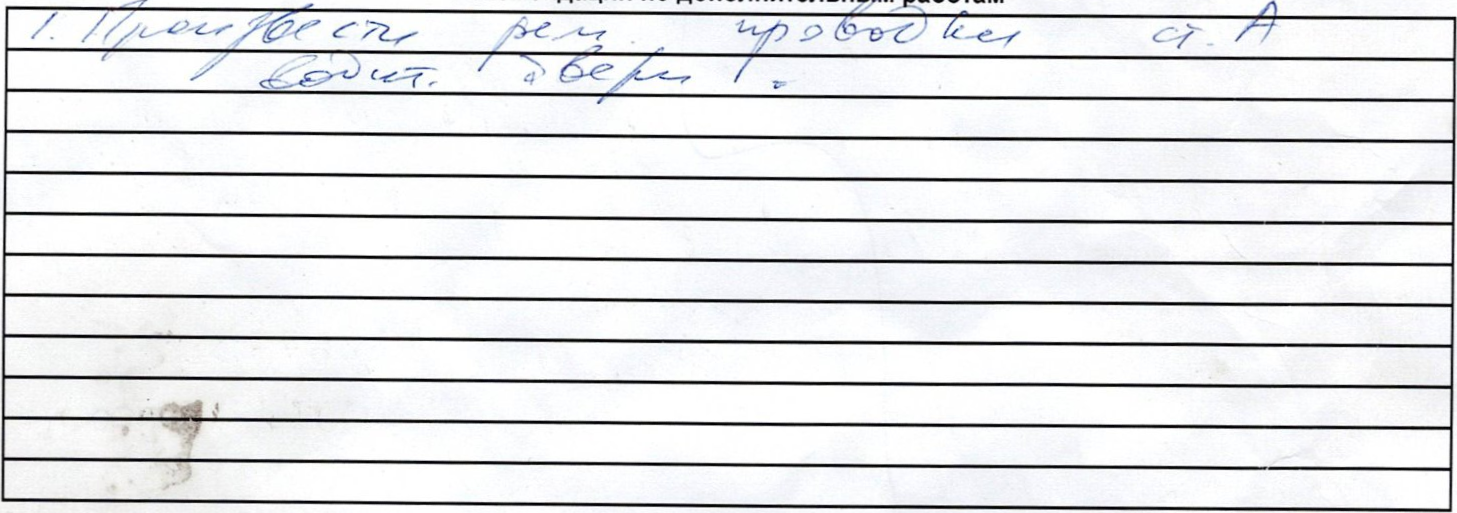

In [ ]:
bboxes = []
for c in cntsSorted[1:5]:
    area = cv2.contourArea(c)
    if area > 350:
        x, y, w, h = cv2.boundingRect(c)
        bboxes.append((x, y, w, h))

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cntsSorted[1], cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
line = cv2.line(img.copy(),(cols-1,righty),(0,lefty),(0,255,0),2)
x_axis      = np.array([1, 0])    # unit vector in the same direction as the x axis
your_line   = np.array([vx, vy])  # unit vector in the same direction as your line
dot_product = np.dot(x_axis, your_line)
angle_2_x   = float(np.arccos(dot_product))
print(angle_2_x)
print(180*angle_2_x/3.14)
print(round(180*angle_2_x/3.14))

(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), -round(180*angle_2_x/3.14), 1.0)
rotated = cv2.warpAffine(img.copy(), M, (w, h))
# cv2_imshow(rotated)


img_gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

x, y, w, h = cv2.boundingRect(cntsSorted[1])
cropped_image = rotated[y:y + h, x:x + w]
cv2_imshow(cropped_image)


